# DateTime Objects in Pandas
* Pandas was developed for financial modelling (Wes Mckinney, AQR Capital)
* Time series analysis therefore comprises an integral part of the package
* We're going to look at DateTime Objects in Pandas

In [1]:
import pandas as pd

In [2]:
pd.to_datetime('2019 july 23')

Timestamp('2019-07-23 00:00:00')

In [3]:
pd.to_datetime('july 23 2019')

Timestamp('2019-07-23 00:00:00')

In [4]:
pd.to_datetime('jul 23 2019')

Timestamp('2019-07-23 00:00:00')

In [5]:
pd.to_datetime('jul 23rd 2019')

Timestamp('2019-07-23 00:00:00')

In [6]:
pd.to_datetime('07.23.19')

Timestamp('2019-07-23 00:00:00')

In [7]:
pd.to_datetime('07.23.19') - pd.to_datetime('07.3.19 7:43:02') 

Timedelta('19 days 16:16:58')

**In Summary**: If you're dealing with dates and times and need to parse that information, it's better to convert everything to Pandas Timestamp / DateTime objects (rather than leaving it in string format)!

---

**Date Range Method**

What happens if you want to create a range of dates?
You can use `pd.date_range()` to create a DateTimeIndex (array of Timestamps):

In [8]:
pd.date_range('jan 1 2021', 'jan 22 2021', freq='12h13min', tz='US/Eastern')
#also timezone aware.

DatetimeIndex(['2021-01-01 00:00:00-05:00', '2021-01-01 12:13:00-05:00',
               '2021-01-02 00:26:00-05:00', '2021-01-02 12:39:00-05:00',
               '2021-01-03 00:52:00-05:00', '2021-01-03 13:05:00-05:00',
               '2021-01-04 01:18:00-05:00', '2021-01-04 13:31:00-05:00',
               '2021-01-05 01:44:00-05:00', '2021-01-05 13:57:00-05:00',
               '2021-01-06 02:10:00-05:00', '2021-01-06 14:23:00-05:00',
               '2021-01-07 02:36:00-05:00', '2021-01-07 14:49:00-05:00',
               '2021-01-08 03:02:00-05:00', '2021-01-08 15:15:00-05:00',
               '2021-01-09 03:28:00-05:00', '2021-01-09 15:41:00-05:00',
               '2021-01-10 03:54:00-05:00', '2021-01-10 16:07:00-05:00',
               '2021-01-11 04:20:00-05:00', '2021-01-11 16:33:00-05:00',
               '2021-01-12 04:46:00-05:00', '2021-01-12 16:59:00-05:00',
               '2021-01-13 05:12:00-05:00', '2021-01-13 17:25:00-05:00',
               '2021-01-14 05:38:00-05:00', '2021-0

In [9]:
now = pd.to_datetime('today')

In [10]:
now.tz_localize('UTC').tz_convert('Europe/Berlin')
#timezone conversion can be useful as well, though we don't need this this week.

Timestamp('2021-01-25 14:34:56.883433+0100', tz='Europe/Berlin')

---

#### This is all nice and fine, but why do we care?

The reason we care for Timestamps in pandas is because they allow us to perform time related actions on the data.
Several things you can do with a timestamp:

- extract the hour
- extract the day
- extract the month
- extract the year
- Slice a DataFrame or Series if the DateTimeIndex is the Index of the DataFrame
- calculate time differences

In [11]:
stocks = pd.read_csv('/Users/pawlodkowski/Downloads/stock_px.csv')

In [12]:
stocks.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)

In [13]:
#how could I extract just the year (as an integer) from the Time column?
stocks['Year'] = stocks['Time'].str.split('-').str[0].astype(int)

#this works, but its a brittle approach. Very dependent on the format.

In [14]:
stocks['Time'] = pd.to_datetime(stocks['Time'])

In [15]:
stocks['Time'].dt.year

0       2003
1       2003
2       2003
3       2003
4       2003
        ... 
2209    2011
2210    2011
2211    2011
2212    2011
2213    2011
Name: Time, Length: 2214, dtype: int64

In [16]:
stocks['Time'].dt.month

0        1
1        1
2        1
3        1
4        1
        ..
2209    10
2210    10
2211    10
2212    10
2213    10
Name: Time, Length: 2214, dtype: int64

In [17]:
stocks['Time'].dt.isocalendar().week

0        1
1        1
2        2
3        2
4        2
        ..
2209    41
2210    41
2211    41
2212    41
2213    41
Name: week, Length: 2214, dtype: UInt32

---

#### DateTime Index:

- It's also useful to make a DateTime column your index, if you want to plot things easily.
- The x-axis will know how to format itself automatically.

In [18]:
stocks.set_index('Time', inplace=True)

<AxesSubplot:xlabel='Time'>

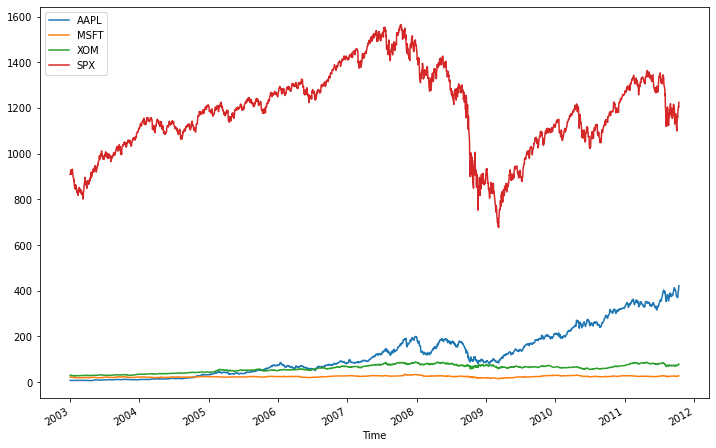

In [19]:
stocks[['AAPL', 'MSFT', 'XOM', 'SPX']].plot(figsize=(12, 8))